<a href="https://colab.research.google.com/github/likhithakarnati21/Parkinson-s-disease-classification-model/blob/main/Parkinsons_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/projects/dataset/pd_speech_features.csv")
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,0.00129,0.00200,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995,69.997496,76.088046,72.465512,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631,0.77778,11.7245,2.8277,1.17300,0.265120,0.083127,...,0.071728,0.010352,-2.730300,66.5007,36.9934,26.3508,51.9577,21.5451,8.2488,8.0024,6.9635,6.9189,5.0622,4.6068,7.7218,2.7224,2.4171,2.9383,4.2077,3.1541,2.8531,2.7496,2.1550,2.9457,2.1993,1.9830,1.8314,2.0062,1.6058,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,0.00112,0.00157,0.05516,0.502,0.02320,0.03675,0.06195,0.06961,0.984322,0.017974,21.497,67.415903,73.046374,71.528945,564.363614,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722,0.81250,13.8284,2.8908,1.02210,0.220040,0.127410,...,0.729330,0.780410,5.229400,8643.9860,3962.0554,2976.2411,4329.0607,4005.1329,1127.6762,116.5331,20.2332,13.6395,12.5514,13.6965,60.8974,6.2958,3.0323,3.4039,4.3794,2.4329,2.0585,2.1839,2.2061,3.0999,1.9824,1.6227,1.5783,2.0470,1.5772,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,0.00111,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651,62.661706,71.633549,68.086583,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339,0.81818,26.9273,2.6975,0.84951,0.157560,0.116890,...,0.269510,-0.005522,0.350540,29.2717,32.4971,38.9453,85.1480,62.5132,9.7308,6.8890,6.1357,5.4926,3.9078,4.0864,6.9828,3.4411,3.5173,3.7204,4.2212,3.4881,3.4851,3.3007,2.0427,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,0.00268,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865,76.306989,81.000749,79.190593,819.529588,1201.813897,3154.035654,4122.163933,238.667052,191.984916,573.752909,526.147599,0.98548,139.5744,1.6961,0.83405,0.172950,0.147370,...,0.366920,-0.492650,0.191640,591.0116,65.3827,53.9852,45.4458,34.6650,88.3259,46.6869,23.2911,19.2022,42.3957,100.3649,7.1967,6.3892,6.5496,6.0264,4.7656,4.8909,4.2531,3.0295,2.0362,1.8478,2.5776,2.2064,1.9491,1.9120,1.8829,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4

In [16]:
df.shape

(756, 755)

#Finding nan values

In [17]:
df.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

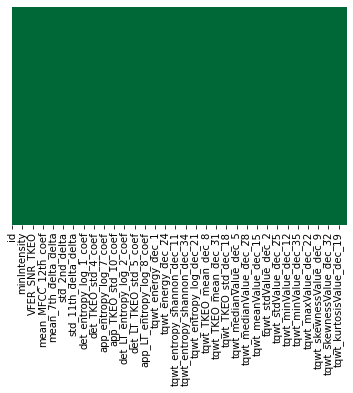

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="RdYlGn_r")

#Cleaning the data

In [21]:
df["class"]=df["class"].astype(bool)

In [20]:
df["class"].value_counts()

True     564
False    192
Name: class, dtype: int64

##True  ---> who is suffering from parkinson's disease
##False ---> who is healthy

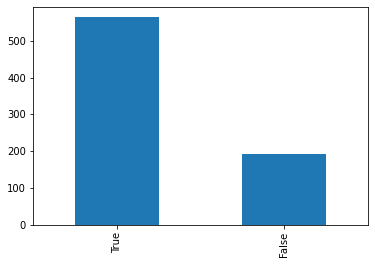

In [22]:
df["class"].value_counts().plot(kind="bar")

In [23]:
df.gender.value_counts()

1    390
0    366
Name: gender, dtype: int64

### 1 --> for male
### 0 --> for female

In [24]:
m=df[(df["gender"]==1) & (df["class"]==1)].value_counts().sum()

print("from the male category who is suffering from parkinson's disease is : ",m)

from the male category who is suffering from parkinson's disease is :  321


In [25]:
f=df[(df["gender"]==0) & (df["class"]==1)].value_counts().sum()
print("from the female category who is suffering from parkinson's disease is : ",f)

from the female category who is suffering from parkinson's disease is :  243


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: bool(1), float64(749), int64(5)
memory usage: 4.3 MB


In [27]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_33,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,756.000000,756.000000,756.000000,756.000000,756.00000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,1.673391e-05,0.000605,0.001159,0.001815,0.067473,0.60642,0.034375,0.041175,0.055366,0.103125,0.961508,0.051131,18.859632,70.828609,76.135371,73.997008,647.174519,1233.852088,2562.425251,3547.259244,213.363237,297.174077,536.821070,506.604856,0.904423,32.295832,4.454840,1.092503,0.215038,0.144832,...,-0.054733,-0.041840,-0.015615,-0.005242,1059.146612,377.357439,328.927860,317.994439,305.036007,172.362746,40.408662,15.064513,12.107316,11.757945,11.871530,9.529080,3.741615,3.332313,3.270290,2.995472,2.710678,2.608229,2.553457,2.432001,2.300006,2.183111,2.176542,2.595250,6.782668,15.766942,21.026054,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,2.290134e-05,0.000981,0.001677,0.002942,0.042969,0.38257,0.022366,0.027165,0.033939,0.067097,0.064095,0.104579,5.576473,8.858268,6.446451,7.018006,134.957916,169.090402,393.315598,347.864299,306.976045,450.125488,754.341717,658.326606,0.147826,31.140746,7.313057,0.350789,0.132549,0.060065,...,1.267214,1.431979,1.451535,4.448635,3522.528562,1514.808488,1338.602187,1275.228777,1211.296576,821.740615,239.548628,75.865176,77.370230,74.594974,39.125733,36.349168,4.821202,2.962967,2.049877,1.444227,1.310653,1.229086,1.061068,0.892523,0.868506,0.796446,1.709860,5.979131,31.707014,45.247304,43.716898,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.0000

In [28]:
df.groupby("class").mean()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_33,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,139.421875,0.359375,0.767434,0.663866,0.430807,372.244792,371.031250,0.005699,0.000290,0.001405,0.000009,0.000314,0.000615,0.000942,0.055573,0.490938,0.029462,0.034238,0.042146,0.088386,0.973830,0.033170,20.874354,75.004255,78.701976,77.072415,716.143478,1304.275157,2529.402526,3538.730253,199.442561,313.287441,639.308447,577.193220,0.934827,23.947211,2.950426,1.196693,0.208056,0.156717,...,-0.152584,-0.080137,-0.082539,-0.112316,828.938718,198.524514,142.676379,123.488763,84.602292,44.802764,12.963558,7.390001,6.648563,7.858938,8.822049,5.447146,3.091249,2.988729,2.835976,2.546435,2.273758,2.169000,2.241918,2.086915,2.105440,2.016404,2.153136,3.335094,16.862654,41.762340,47.053772,45.754404,32.006881,21.592319,14.797452,10.726868,9.021939,9.619535,9.326543,15.074830
True,120.760638,0.569149,0.739084,0.712856,0.508888,307.539007,306.218085,0.006585,0.000414,0.002637,0.000019,0.000704,0.001344,0.002112,0.071524,0.645733,0.036048,0.043536,0.059867,0.108143,0.957314,0.057246,18.173770,69.407113,75.261633,72.950061,623.695724,1209.878277,2573.667030,3550.162730,218.102190,291.688677,501.931750,482.574774,0.894072,35.137916,4.966981,1.057034,0.217415,0.140786,...,-0.021422,-0.028802,0.007167,0.031209,1137.515256,438.236732,392.332620,384.209137,380.077272,215.787421,49.751676,17.677113,13.965615,13.085266,12.909652,10.918674,3.963016,3.449278,3.418141,3.148336,2.859417,2.757754,2.659513,2.549478,2.366241,2.239862,2.184510,2.343388,3.351184,6.917445,12.165554,19.593113,19.719812,17.565102,13.556976,12.726897,13.516916,16.562531,16.598373,37.066227


# Finding relations

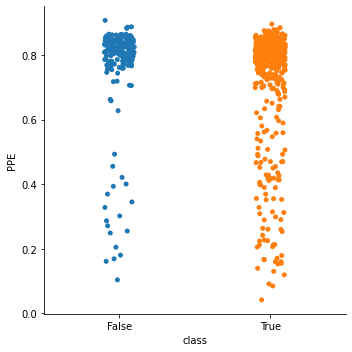

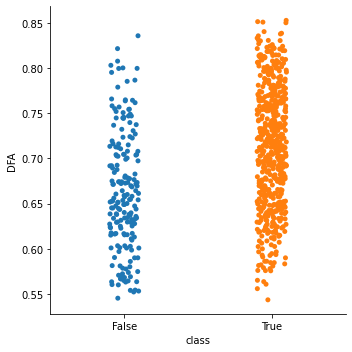

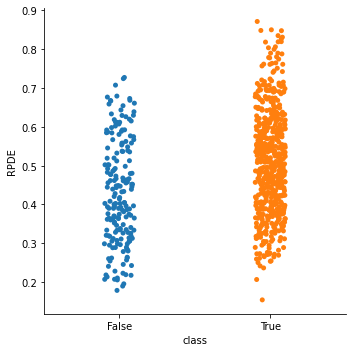

In [29]:
sns.catplot(x="class",y="PPE",data=df)


sns.catplot(x="class",y="DFA",data=df)


sns.catplot(x="class",y="RPDE",data=df)

Machine Learning model selection(heighest accuracy)

## k-nearest neighbors
### .KNN

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
from sklearn.model_selection import train_test_split
X=df.drop("class",axis=1)

In [32]:
scaler=StandardScaler()
scaler.fit(df.drop("class",axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
scaler_feature = scaler.transform(df.drop("class",axis=1))
df_feature = pd.DataFrame(scaler_feature,columns=X.columns)
df_feature.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_33,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,-1.725191,0.968742,0.627644,0.256144,0.605835,-0.846892,-0.842373,0.933328,-0.407251,-0.054993,0.037843,0.066329,0.078201,0.062894,-0.201283,-0.233889,-0.190826,-0.228931,-0.208934,-0.190677,0.145143,-0.142650,0.024291,-0.093886,-0.007346,-0.218368,-0.799532,-1.195436,-0.293249,0.310083,-0.365974,-0.475797,-0.373561,-0.167142,-0.857265,-0.661029,-0.222645,0.229627,0.378088,-1.027997,...,-0.093880,0.079361,0.017901,-0.612966,-0.281986,-0.224840,-0.226189,-0.208757,-0.234194,-0.199847,-0.135370,-0.106852,-0.067104,-0.089821,-0.185799,-0.049753,-0.211543,-0.309089,-0.162063,0.839917,0.338545,0.199362,0.184977,-0.310563,0.743947,0.020341,-0.113267,-0.127837,-0.150744,-0.313179,-0.445877,-0.584822,-0.619412,-0.576762,-0.482286,-0.399331,-0.484533,-0.775137,-0.814727,-0.366595
1,-1.725191,0.968742,0.121620,-0.080433,0.368415,-0.907404,-0.902773,1.040014,-0.426092,-0.142570,-0.027698,-0.086722,-0.023255,-0.083360,-0.286750,-0.273123,-0.499987,-0.162993,0.194112,-0.499839,0.356172,-0.317264,0.473259,-0.385512,-0.479495,-0.351909,-0.614012,-1.287056,-0.455051,-0.139738,-0.504927,-0.468372,-0.382658,-0.438333,-0.622240,-0.593424,-0.214011,-0.200831,0.037762,-0.290252,...,0.583518,0.538891,0.548765,1.177464,2.154663,2.368003,1.978979,3.147452,3.056680,1.163318,0.317993,0.068175,0.019816,0.010644,0.046675,1.414127,0.530132,-0.101321,0.065223,0.958883,-0.212079,-0.447563,-0.348518,-0.253272,0.921610,-0.252175,-0.324126,-0.170196,-0.149456,-0.313812,-0.445730,-0.584895,-0.589778,0.193084,0.016183,-0.067120,-0.175566,-0.526647,-0.582972,0.400396
2,-1.725191,0.968742,0.617950,-0.349839,0.733609,-0.927575,-0.922907,1.084576,-0.443557,-0.214916,-0.088871,-0.035705,-0.029223,-0.035742,0.734660,0.760052,0.741128,0.876535,0.659075,0.741133,0.208232,-0.237473,-0.216881,-0.922563,-0.698803,-0.842738,-0.732045,-1.192138,-0.520533,0.376457,-0.172686,-0.539071,-0.510884,-0.641998,-0.583791,-0.172510,-0.240461,-0.693162,-0.433923,-0.465513,...,-0.004858,0.217570,0.006958,0.080028,-0.292562,-0.227810,-0.216774,-0.182713,-0.200350,-0.198043,-0.140021,-0.117771,-0.085551,-0.105307,-0.199109,-0.070097,-0.062373,0.062474,0.219725,0.849271,0.593549,0.713906,0.704703,-0.436470,0.971960,-0.078916,-0.300716,-0.154330,-0.111184,-0.313482,-0.446030,-0.584767,-0.629033,-0.356261,-0.156055,-0.067593,-0.463462,-0.756063,-0.804390,-0.780935
3,-1.711445,-1.032266,-1.980560,1.382279,0.753631,-1.472186,-1.466513,2.464215,-0.275316,0.710353,1.256919,0.903010,0.907750,0.899601,-0.301887,-0.207732,-0.466431,-0.464316,-0.316846,-

# Splitting the data

In [34]:
x=df_feature
y=df["class"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
from sklearn.neighbors import KNeighborsClassifier

# Finding best value for K

In [36]:
import numpy as np
err_rate = []
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predi = knn.predict(X_test)
    err_rate.append(np.mean(predi != y_test))

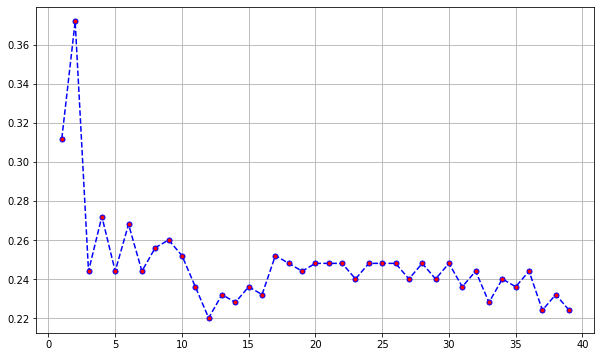

In [37]:
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,40),err_rate,color = 'blue',linestyle='--',marker='.',markerfacecolor='red',markersize=10)

# Prediction

In [38]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)

In [39]:
prediction

array([ True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True, False,  True, False,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,

In [40]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print('Classification report')
print(classification_report(y_test,prediction))
print('\n')
print('Confission matrix')
print(confusion_matrix(y_test,prediction))

Classification report
              precision    recall  f1-score   support

       False       0.50      0.39      0.44        61
        True       0.82      0.87      0.84       189

    accuracy                           0.76       250
   macro avg       0.66      0.63      0.64       250
weighted avg       0.74      0.76      0.75       250



Confission matrix
[[ 24  37]
 [ 24 165]]


# Hatmap for confusion matrix

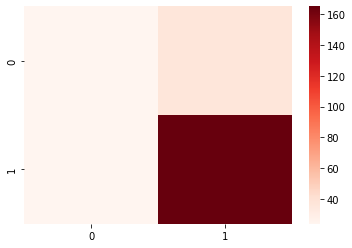

In [41]:
sns.heatmap(confusion_matrix(y_test,prediction),cmap="Reds")

In [42]:
KNN=accuracy_score(y_test,prediction)*100
KNN

75.6

# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
prediction = rfc.predict(X_test)
prediction

array([False, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
        True,  True,

In [45]:
print('Classification report')
print(classification_report(y_test,prediction))
print('\n')
print('Confission matrix')
print(confusion_matrix(y_test,prediction))

Classification report
              precision    recall  f1-score   support

       False       0.84      0.59      0.69        61
        True       0.88      0.96      0.92       189

    accuracy                           0.87       250
   macro avg       0.86      0.78      0.81       250
weighted avg       0.87      0.87      0.86       250



Confission matrix
[[ 36  25]
 [  7 182]]


# Heatmap for confusion matrix

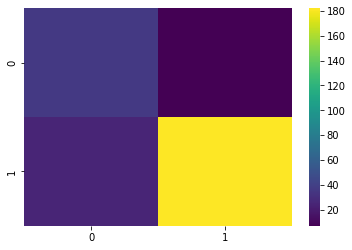

In [46]:
sns.heatmap(confusion_matrix(prediction,y_test),cmap="viridis")

In [48]:
RandomForest=accuracy_score(prediction,y_test)*100
RandomForest

87.2

# Decision Tree

In [49]:
X = df.drop("class",axis=1)
y = df["class"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
prediction = dtree.predict(X_test)
prediction

array([ True, False, False,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True,  True,  True, False,
       False,  True,  True, False,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False, False, False,  True,  True, False, False,  True,  True,
        True,  True,

In [52]:
print('Classification report')
print(classification_report(y_test,prediction))
print('\n')
print('Confission matrix')
print(confusion_matrix(y_test,prediction))

Classification report
              precision    recall  f1-score   support

       False       0.55      0.57      0.56        61
        True       0.86      0.85      0.85       189

    accuracy                           0.78       250
   macro avg       0.70      0.71      0.71       250
weighted avg       0.78      0.78      0.78       250



Confission matrix
[[ 35  26]
 [ 29 160]]


# heatmap for confusion matrix

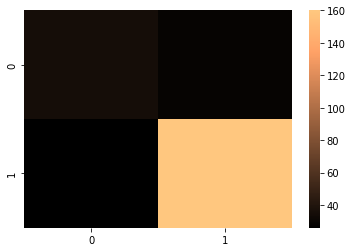

In [53]:
sns.heatmap(confusion_matrix(prediction,y_test),cmap="copper")

In [54]:
DecisionTree=accuracy_score(prediction,y_test)*100
DecisionTree

78.0

# Logistic regression

In [55]:
X = df_feature
y = df['class']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
from sklearn.linear_model import LogisticRegression
logireg = LogisticRegression()
logireg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
prediction_logi = logireg.predict(X_test)
prediction_logi

array([False, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,

In [58]:
print('Classification report')
print(classification_report(y_test,prediction))
print('\n')
print('Confission matrix')
print(confusion_matrix(y_test,prediction))

Classification report
              precision    recall  f1-score   support

       False       0.55      0.57      0.56        61
        True       0.86      0.85      0.85       189

    accuracy                           0.78       250
   macro avg       0.70      0.71      0.71       250
weighted avg       0.78      0.78      0.78       250



Confission matrix
[[ 35  26]
 [ 29 160]]


# Heatmap for confusion matrix

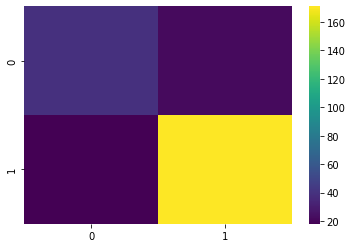

In [59]:
sns.heatmap(confusion_matrix(y_test,prediction_logi),cmap='viridis')

In [60]:
LogisticRegression=accuracy_score(y_test,prediction_logi)*100
LogisticRegression

84.0

# SVC(support vector Classifier)

In [61]:
from sklearn.svm import SVC

In [62]:
model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [63]:
y_pred

array([False, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,

In [64]:
print('Classification report')
print(classification_report(y_test,prediction))
print('\n')
print('Confission matrix')
print(confusion_matrix(y_test,prediction))

Classification report
              precision    recall  f1-score   support

       False       0.55      0.57      0.56        61
        True       0.86      0.85      0.85       189

    accuracy                           0.78       250
   macro avg       0.70      0.71      0.71       250
weighted avg       0.78      0.78      0.78       250



Confission matrix
[[ 35  26]
 [ 29 160]]


# Heatmap for confusion matrix

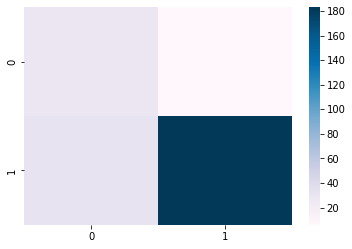

In [65]:
sns.heatmap(confusion_matrix(y_pred,y_test),cmap="PuBu")

In [66]:
SVC=accuracy_score(y_pred,y_test)*100
SVC

84.8

In [67]:
print("accuracy for KNN is :",KNN)
print("accuracy for RandomForest is :",RandomForest)
print("accuracy for DecisionTree is :",DecisionTree)
print("accuracy for LogisticRegression is :",LogisticRegression)
print("accuracy for SVC is :",SVC)

accuracy for KNN is : 75.6
accuracy for RandomForest is : 87.2
accuracy for DecisionTree is : 78.0
accuracy for LogisticRegression is : 84.0
accuracy for SVC is : 84.8


In [68]:
import joblib
joblib.dump(rfc,"parkinson-disease-classification")

['parkinson-disease-classification']